In [6]:
from nsepy import get_history
from datetime import date

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
nifty = get_history(symbol="NIFTY",
                            start=date(2015,4,1),
                            end=date(2017,3,31),
                            index=True)

In [5]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-04-01,8483.70,8603.40,8464.75,8586.25,136312446,6.863030e+10
2015-04-06,8615.80,8667.55,8573.75,8659.90,150877855,7.633000e+10
2015-04-07,8684.45,8693.60,8586.85,8660.30,141765381,7.287010e+10
2015-04-08,8698.95,8730.50,8679.80,8714.40,149617725,7.889650e+10
2015-04-09,8756.20,8785.50,8682.45,8778.30,158192905,8.391190e+10


In [218]:
nifty['Returns']=(nifty.iloc[:,3]-nifty.iloc[:,0])*100/nifty.iloc[:,0]

In [219]:
nifty1 = get_history(symbol="NIFTY",
                            start=date(2015,4,1),
                            end=date(2016,3,31),
                            index=True)

In [220]:
nifty2 = get_history(symbol="NIFTY",
                            start=date(2016,4,1),
                            end=date(2017,3,31),
                            index=True)

In [221]:
nifty_return_1=(nifty1.iloc[-1,3]-nifty1.iloc[0,0])/nifty1.iloc[0,0]

In [222]:
nifty_return_2=(nifty2.iloc[-1,3]-nifty2.iloc[0,0])/nifty2.iloc[0,0]

In [223]:
total_return=(1+nifty_return_1)*(1+nifty_return_2)
annualised_return=(np.sqrt(total_return)-1)*100
Rm=annualised_return
Rm

4.124419343896135

In [224]:
VARm=round((np.var(nifty['Returns'])*252),3)
VARm

168.853

In [225]:
Rf=8.25

In [3]:
df=pd.read_csv('ind_nifty50list.csv')
df.drop([18],axis=0,inplace=True)
df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [5]:
nifty_stocks=list(df['Symbol'])
nifty_stocks[0]

'ADANIPORTS'

In [228]:
#function for getting BETA of a stock w.r.t the market portfolio
def Beta(X,Y):
    """
    function for getting BETA of a stock w.r.t the market portfolio
    
    Parameters
    ----------
    X : name of the chosen stock. 
    
    y : name of the market portfolio.
       
    
    """
    X_history=get_history(symbol=X,
                    start=date(2015,4,1),
                    end=date(2017,3,31))
    X_history=X_history.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history['Returns']=(X_history.iloc[:,3]-X_history.iloc[:,0])*100/X_history.iloc[:,0]
    Y_history = get_history(symbol=Y,
                            start=date(2015,4,1),
                            end=date(2017,3,31),
                            index=True)
    Y_history['Returns']=(Y_history.iloc[:,3]-Y_history.iloc[:,0])*100/Y_history.iloc[:,0]
    var=np.var(Y_history['Returns'])
    cov=np.cov(X_history['Returns'], Y_history['Returns'])[0,1]
    b=round(cov/var,3)
    return b

In [229]:
#Eg.
Beta(nifty_stocks[3],'NIFTY')
# nifty_stocks[3] is BAJAJ-AUTO

0.897

In [231]:
Beta_list=[]
for i in range(0,49):
    Beta_list.append(Beta(nifty_stocks[i],'NIFTY'))

In [232]:
Beta_list[0:5]

[1.311, 0.917, 1.378, 0.897, 1.0]

In [7]:
def K(X):
    """
    function for finding a stock's annualised returns
    
    Parameters
    ----------
    X : name of the chosen stock.(datatype=string)
    """
    X_history1=get_history(symbol=X,
                    start=date(2015,4,1),
                    end=date(2016,3,31))
    X_history1=X_history1.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history1_return1=(X_history1.iloc[-1,3]-X_history1.iloc[0,0])/X_history1.iloc[0,0]
    
    X_history2=get_history(symbol=X,
                    start=date(2016,4,1),
                    end=date(2017,3,31))
    X_history2=X_history2.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history2_return2=(X_history2.iloc[-1,3]-X_history2.iloc[0,0])/X_history2.iloc[0,0]
    
    total_returns=(1+X_history1_return1)*(1+X_history2_return2)
    
    annualized_returns=(np.sqrt(total_returns)-1)*100
    return annualized_returns

In [9]:
K('ADANIPORTS')

4.864530406350309

In [234]:
expected_returns=[]
for j in range(0,49):
    expected_returns.append(K(nifty_stocks[j])) 

In [235]:
d={'Beta':np.array(Beta_list),'Expected_returns':np.array(expected_returns)}
df1=pd.DataFrame(data=d)
df1.head()

,Beta,Expected_returns
0,1.311,4.864530
1,0.917,14.950098
2,1.378,-5.844274
3,0.897,17.544906
4,1.000,-46.986126


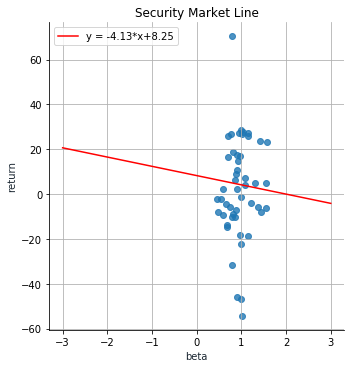

In [236]:
sns.lmplot(x='Beta',y='Expected_returns',data=df1,fit_reg=False)
x = np.linspace(-3,3,100)
y = -4.13*x+8.25
plt.plot(x, y, '-r', label='y = -4.13*x+8.25')
plt.title('Security Market Line')
plt.xlabel('beta', color='#1C2833')
plt.ylabel('return', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### The stocks above the line are undervalued and the ones below the line are overvalued

In [237]:
undervalued_stocks=[]
for i in range(0,49):
    if(df1['Expected_returns'][i]>8.25-4.13*(df1['Beta'][i])):
        undervalued_stocks.append(nifty_stocks[i])    

In [238]:
len(undervalued_stocks)

23

In [239]:
truth_values=[]
for i in range(0,49):
    if(df1['Expected_returns'][i]>8.25-4.13*(df1['Beta'][i])):
        truth_values.append(1)
    else:
        truth_values.append(0)
truth_values[0:5]

[1, 1, 0, 1, 0]

In [240]:
df['Undervalued']=np.array(truth_values)

In [241]:
df.head()

,Company Name,Industry,Symbol,Series,ISIN Code,Undervalued
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042,1
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026,1
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034,0
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010,1
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024,0


In [242]:
df_u=df[df['Undervalued']==1]
df_u

,Company Name,Industry,Symbol,Series,ISIN Code,Undervalued
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042,1
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026,1
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010,1
5,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018,1
9,Britannia Industries Ltd.,CONSUMER GOODS,BRITANNIA,EQ,INE216A01030,1
13,Eicher Motors Ltd.,AUTOMOBILE,EICHERMOT,EQ,INE066A01013,1
17,HDFC Bank Ltd.,FINANCIAL SERVICES,HDFCBANK,EQ,INE040A01034,1
19,Hero MotoCorp Ltd.,AUTOMOBILE,HEROMOTOCO,EQ,INE158A01026,1
20,Hindalco Industries Ltd.,METALS,HINDALCO,EQ,INE038A01020,1
22,Housing Development Finance Corporation Ltd.,FINANCIAL SERVICES,HDFC,EQ,INE001A01036,1


In [243]:
df_u.groupby('Industry').first().Symbol

Industry
AUTOMOBILE                  BAJAJ-AUTO
CEMENT & CEMENT PRODUCTS      SHREECEM
CONSUMER GOODS              ASIANPAINT
FERTILISERS & PESTICIDES           UPL
FINANCIAL SERVICES          BAJAJFINSV
MEDIA & ENTERTAINMENT             ZEEL
METALS                        HINDALCO
OIL & GAS                     RELIANCE
POWER                             NTPC
SERVICES                    ADANIPORTS
Name: Symbol, dtype: object

In [244]:
df_u.groupby('Industry').last().Symbol

Industry
AUTOMOBILE                      MARUTI
CEMENT & CEMENT PRODUCTS    ULTRACEMCO
CONSUMER GOODS                   TITAN
FERTILISERS & PESTICIDES           UPL
FINANCIAL SERVICES                SBIN
MEDIA & ENTERTAINMENT             ZEEL
METALS                       TATASTEEL
OIL & GAS                     RELIANCE
POWER                        POWERGRID
SERVICES                    ADANIPORTS
Name: Symbol, dtype: object

In [245]:
def returns(X):
    '''
    returns an array for the returns on the stock
    
    Parameters
    ----------
    X : name of the chosen stock.(datatype=string)
    '''
    X_history=get_history(symbol=X,
                    start=date(2015,4,1),
                    end=date(2017,3,31))
    X_history=X_history.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history['Returns']=(X_history.iloc[:,3]-X_history.iloc[:,0])*100/X_history.iloc[:,0]
    return X_history['Returns']
    

## 1) How did I choose my Stocks?
1) I've considered the NIFTY index to be the market portfolio and the return on bonds with two year maturity in 2015 to be the risk free rate.</p>

2) Then, I calculated the beta for each stock in the NIFTY wrt the market portfolio.</p>

3) Then I plotted the Security Market Line, and plotted the return of individual stocks as given by CAPM and identified the undervalued stocks from NIFTY 50.</p>

4) Among the undervalued stocks, I've taken one stock from every Industry (mathematically, they have little CORRELATION), so as to diversify the risk.</p>

In [246]:
my_portfolio=['BAJAJ-AUTO','ASIANPAINT','UPL','ZEEL','HINDALCO','NTPC','ADANIPORTS']

In [249]:
returns(my_portfolio[0])

Date
2015-04-01   -0.357663
2015-04-06    0.315271
2015-04-07    2.676536
2015-04-08    0.389700
2015-04-09   -0.123742
                ...   
2017-03-27   -1.310750
2017-03-28    0.171986
2017-03-29    0.116698
2017-03-30   -0.605623
2017-03-31   -0.604074
Name: Returns, Length: 495, dtype: float64

In [250]:
ra=[]
#ra=individual returns arrays
for i in range(0,7):
    ra.append(returns(my_portfolio[i]))

In [251]:
np.cov(ra[0],ra[0])[0,1]

2.3013889060989703

In [252]:
C=[]
for i in range(0,7):
    a=[]
    for j in range(0,7):
        a.append(np.cov(ra[i],ra[j])[0,1])
    C.append(a)

In [253]:
C[0]

[2.3013889060989703,
 0.6070126652693462,
 0.8227761007687577,
 0.9382654690315826,
 1.0215663747836716,
 0.6229578708224508,
 0.8823105508076518]

In [254]:
u=np.ones(7)

In [255]:
w=(u@np.linalg.inv(C))/(u@np.linalg.inv(C)@(u.T))
# minimum variance portfolio

In [256]:
w

array([0.2495233 , 0.25202259, 0.09620913, 0.09862125, 0.00193022,
       0.25957422, 0.0421193 ])

In [257]:
sum(w)

1.0000000000000002

In [258]:
m=[]
for i in range(0,7):
    m.append(K(my_portfolio[i]))
m    

[17.54490609357797,
 14.950097728335244,
 28.46147890644639,
 25.690627416361455,
 23.279827368884188,
 6.328163947919241,
 4.864530406350309]

In [259]:
returns_pf=m@(w.T)
var_pf=w@C@(w.T)
print('portfolio returns are',round(returns_pf,3), '%')
print('porfolio volatility/risk is', round(np.sqrt((var_pf)*252),3))

portfolio returns are 15.31 %
porfolio volatility/risk is 16.648


In [260]:
print('market returns are', round(Rm,3), '%')
print('market volatility is', round(np.sqrt(VARm),3))

market returns are 4.124 %
market volatility is 12.994


In [261]:
sharpe_ratio=round((returns_pf-Rf)/np.sqrt((var_pf)*252),3)
print('Sharpe ratio for my_portfolio is', sharpe_ratio)

Sharpe ratio for my_portfolio is 0.424


In [262]:
portfolio_daily_returns=[0]
for i in range(0,7):
    portfolio_daily_returns+=w[i]*ra[i]

In [263]:
portfolio_daily_returns

Date
2015-04-01    0.363756
2015-04-06    0.721226
2015-04-07    1.868833
2015-04-08    0.012279
2015-04-09    0.308112
                ...   
2017-03-27   -1.060285
2017-03-28    0.659105
2017-03-29   -0.156221
2017-03-30   -0.076170
2017-03-31    0.461467
Name: Returns, Length: 495, dtype: float64

In [264]:
beta_pf=(np.cov(portfolio_daily_returns,nifty['Returns'])[0,1])/(VARm/252)
round(beta_pf,3)

0.943

In [265]:
jensens_alpha=(returns_pf-Rf)-(beta_pf)*(Rm-Rf)
round(jensens_alpha,3)

10.95

In [266]:
treynors_measure=(returns_pf-Rf)/beta_pf
round(treynors_measure,3)

7.487

Var(pf)=Var(ɛ_pf)+(beta_pf^2)*(Var(m)^2)
</p> If beta of a pf is less than one, then it has lesser systematic risk than the market portfolio </p>

In [267]:
weights=[[0]*7]*25000
num_portfolios=25000
for i in range(num_portfolios):
    weights[i] = np.array(np.random.random(7))
    weights[i]= weights[i]/np.sum(weights[i])

In [268]:
portfolio_returns=[]
for i in range(25000):
    portfolio_returns.append(m@(weights[i].T))

In [269]:
porfolio_std_dev=[]
for i in range(25000):
    porfolio_std_dev.append(np.sqrt((weights[i])@C@(weights[i].T)*252))

In [270]:
sharpe_ratios=[]
for i in range(25000):
    sharpe_ratios.append((portfolio_returns[i]-Rf)/porfolio_std_dev[i])

In [271]:
data={'portfolio_returns':portfolio_returns,'Std.Dev':porfolio_std_dev,'sharpe_ratio':sharpe_ratios}
portfolios=pd.DataFrame(data)

In [272]:
portfolios.head()

,portfolio_returns,Std.Dev,sharpe_ratio
0,12.872441,19.851431,0.232852
1,15.237581,18.342157,0.380957
2,16.633894,18.582514,0.451171
3,17.530328,17.118943,0.542109
4,18.472549,19.749797,0.517603


In [273]:
max_sharpe_port = portfolios.iloc[portfolios['sharpe_ratio'].idxmax()]
min_volatility_port = portfolios.iloc[portfolios['Std.Dev'].idxmin()]

The Boundary of the red portion is the EFFICIENT FRONTIER


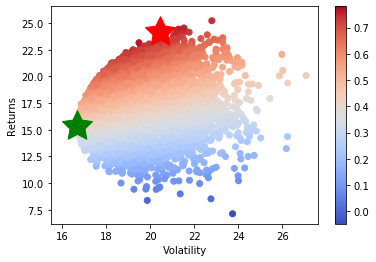

In [274]:
plt.scatter(portfolios['Std.Dev'],portfolios.portfolio_returns,c=portfolios.sharpe_ratio,cmap='coolwarm');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar();
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000);
plt.scatter(min_volatility_port[1],min_volatility_port[0],marker=(5,1,0),color='g',s=1000);
print('The Boundary of the red portion is the EFFICIENT FRONTIER')

In [275]:
print(max_sharpe_port)
print(min_volatility_port)

portfolio_returns    24.189120
Std.Dev              20.414163
sharpe_ratio          0.780787
Name: 23417, dtype: float64
portfolio_returns    15.377581
Std.Dev              16.661075
sharpe_ratio          0.427798
Name: 4637, dtype: float64


In [276]:
new_portfolio=['BAJAJ-AUTO','ASIANPAINT','UPL','ZEEL','HINDALCO','NTPC','ADANIPORTS','SHREECEM','BAJAJFINSV','RELIANCE',
              'MARUTI','SBIN','TITAN','POWERGRID','BRITANNIA']

In [278]:
ra_new=[]
#ra=individual returns arrays
for i in range(0,15):
    ra_new.append(returns(new_portfolio[i]))

In [279]:
C_new=[]
for i in range(0,15):
    b=[]
    for j in range(0,15):
        b.append(np.cov(ra_new[i],ra_new[j])[0,1])
    C_new.append(b)

In [280]:
u_new=np.ones(15)
w_new=(u_new@np.linalg.inv(C_new))/(u_new@np.linalg.inv(C_new)@(u_new.T))
# minimum variance portfolio

In [281]:
w_new

array([ 1.46302568e-01,  8.05896085e-02,  1.89885767e-02, -1.50191141e-02,
       -5.49957140e-02,  9.05545167e-02,  8.32979317e-03,  5.96480838e-02,
        3.29047319e-02,  1.46068592e-01,  6.01162285e-02, -1.90232625e-04,
        8.18578930e-02,  2.42969181e-01,  1.01875287e-01])

In [282]:
sum(w_new)

1.0000000000000002

In [283]:
m_new=[]
for i in range(0,15):
    m_new.append(K(new_portfolio[i]))
m_new=np.array(m_new)  
type(m_new)

numpy.ndarray

In [284]:
returns_new_pf=m_new@(w_new.T)
var_new_pf=w_new@C_new@(w_new.T)
print('portfolio returns are',round(returns_new_pf,3), '%')
print('porfolio volatility/risk is', round(np.sqrt((var_new_pf)*252),3))

portfolio returns are 20.082 %
porfolio volatility/risk is 13.432


In [285]:
sharpe_ratio_new=round((returns_new_pf-Rf)/np.sqrt((var_new_pf)*252),3)
print('Sharpe ratio for my_portfolio is', sharpe_ratio_new)

Sharpe ratio for my_portfolio is 0.881


#### Max Sharpe ratio for the previous portfolio was 0.78, it is significantly higher now, which means more reward per unit risk!

In [286]:
new_portfolio_daily_returns=[0]
for i in range(0,15):
    new_portfolio_daily_returns+=w_new[i]*ra_new[i]

In [287]:
beta_new_pf=(np.cov(new_portfolio_daily_returns,nifty['Returns'])[0,1])/(VARm/252)
round(beta_new_pf,3)

0.806

In [288]:
new_jensens_alpha=(returns_new_pf-Rf)-(beta_new_pf)*(Rm-Rf)
round(new_jensens_alpha,3)

15.16

In [289]:
weights_new=[[0]*15]*25000
num_portfolios=25000
for i in range(num_portfolios):
    weights_new[i] = np.array(np.random.random(15))
    weights_new[i]= weights_new[i]/np.sum(weights_new[i])

portfolio_returns_new=[]
for i in range(25000):
    portfolio_returns_new.append(m_new@(weights_new[i].T))  
    
porfolio_std_dev_new=[]
for i in range(25000):
    porfolio_std_dev_new.append(np.sqrt((weights_new[i])@C_new@(weights_new[i].T)*252)) 
    
sharpe_ratios_new=[]
for i in range(25000):
    sharpe_ratios_new.append((portfolio_returns_new[i]-Rf)/porfolio_std_dev_new[i]) 

In [290]:
data2={'portfolio_returns':portfolio_returns_new,'Std.Dev':porfolio_std_dev_new,'sharpe_ratio':sharpe_ratios_new}
portfolios2=pd.DataFrame(data2)
portfolios2.head()

,portfolio_returns,Std.Dev,sharpe_ratio
0,23.089909,16.441963,0.902563
1,22.361586,14.814656,0.952542
2,20.658113,15.425258,0.804402
3,20.002486,16.029508,0.733178
4,23.245577,15.209129,0.985959


In [291]:
max_sharpe_port_new = portfolios2.iloc[portfolios2['sharpe_ratio'].idxmax()]
min_volatility_port_new = portfolios2.iloc[portfolios2['Std.Dev'].idxmin()]

In [292]:
print(max_sharpe_port_new)
print(min_volatility_port_new)

portfolio_returns    30.958345
Std.Dev              15.732691
sharpe_ratio          1.443386
Name: 14825, dtype: float64
portfolio_returns    21.197684
Std.Dev              13.879946
sharpe_ratio          0.932834
Name: 21629, dtype: float64


In [293]:
A=[[1,u_new@np.linalg.inv(C_new)@(m_new.T)],[32.486525,m_new@np.linalg.inv(C_new)@(m_new.T)]]
B=[[u_new@np.linalg.inv(C_new)@(u_new.T),1],[m_new@np.linalg.inv(C_new)@(u_new.T),32.486525]]
c=[[u_new@np.linalg.inv(C_new)@(u_new.T),u_new@np.linalg.inv(C_new)@(m_new.T)],[m_new@np.linalg.inv(C_new)@(u_new.T),m_new@np.linalg.inv(C_new)@(m_new.T)]]

In [294]:
weights_sharpe_ratio=(np.linalg.det(A)*(u_new@np.linalg.inv(C_new))+np.linalg.det(B)*(m_new@np.linalg.inv(C_new)))/np.linalg.det(c)

In [295]:
weights_sharpe_ratio

array([ 0.121279  ,  0.03051064,  0.03802661,  0.00980452, -0.03041445,
        0.01020216, -0.03273695,  0.07420694,  0.18791412,  0.17705282,
        0.11526038, -0.05491532,  0.02358204,  0.23763159,  0.09259589])

In [299]:
returns_sharpe_ratio=m_new@(weights_sharpe_ratio.T)
var_sharpe_ratio=w_new@C_new@(weights_sharpe_ratio.T)
print('portfolio returns are',round(returns_sharpe_ratio,3), '%')
print('porfolio volatility/risk is', round(np.sqrt((var_sharpe_ratio)*252),3))

portfolio returns are 32.487 %
porfolio volatility/risk is 13.432


In [300]:
new_jensens_alpha=(32.468-Rf)-(beta_new_pf)*(Rm-Rf)
round(new_jensens_alpha,3)

27.545

In [301]:
new_treynors_measure=(32.468-Rf)/beta_new_pf
round(new_treynors_measure,3)

30.029

### The tangency portfolio with the selected 15 stocks, has a sharpe ratio of 1.46, returns of 32.48% and stdev of 16.5%

In [302]:
new_pf=list(df_u['Symbol'])

In [304]:
ra_3=[]
#ra=individual returns arrays
for i in range(0,23):
    ra_3.append(returns(new_pf[i]))

In [305]:
C_3=[]
for i in range(0,23):
    c=[]
    for j in range(0,23):
        c.append(np.cov(ra_3[i],ra_3[j])[0,1])
    C_3.append(c)

In [306]:
u_3=np.ones(23)
w_3=(u_3@np.linalg.inv(C_3))/(u_3@np.linalg.inv(C_3)@(u_3.T))

In [307]:
m_3=[]
for i in range(0,23):
    m_3.append(K(new_pf[i]))
m_3    

[4.864530406350309,
 14.950097728335244,
 17.54490609357797,
 70.32391793422741,
 25.69809988656242,
 27.073429900900493,
 18.699124922149245,
 10.749171788545397,
 23.279827368884188,
 6.988704648509181,
 27.02607983668779,
 4.251615826511368,
 27.78305587937031,
 6.328163947919241,
 16.316095591282153,
 26.912776801064233,
 26.991315933651293,
 5.044898102306772,
 23.7957988327153,
 8.749394823233336,
 28.46147890644639,
 17.07734920879769,
 25.690627416361455]

In [308]:
returns_new_pf3=m_3@(w_3.T)
var_new_pf3=w_3@C_3@(w_3.T)
print('portfolio returns are',round(returns_new_pf3,3), '%')
print('porfolio volatility/risk is', round(np.sqrt((var_new_pf3)*252),3))

portfolio returns are 18.017 %
porfolio volatility/risk is 12.008


In [309]:
sharpe_ratio_new3=round((returns_new_pf3-Rf)/np.sqrt((var_new_pf3)*252),3)
print('Sharpe ratio for my_portfolio is', sharpe_ratio_new3)

Sharpe ratio for my_portfolio is 0.813


In [310]:
new_pf_daily_returns=[0]
for i in range(0,23):
    new_pf_daily_returns+=w_3[i]*ra_3[i]

In [311]:
beta_new_pf3=(np.cov(new_pf_daily_returns,nifty['Returns'])[0,1])/(VARm/252)
round(beta_new_pf3,3)

0.749

In [312]:
new_jensens_alpha3=(returns_new_pf3-Rf)-(beta_new_pf3)*(Rm-Rf)
round(new_jensens_alpha3,3)

12.856

In [313]:
treynors_measure3=(returns_new_pf3-Rf)/beta_new_pf3
round(treynors_measure3,3)

13.045

In [314]:
weights_3=[[0]*23]*25000
num_portfolios=25000
for i in range(num_portfolios):
    weights_3[i] = np.array(np.random.random(23))
    weights_3[i]= weights_3[i]/np.sum(weights_3[i])

portfolio_returns_new3=[]
for i in range(25000):
    portfolio_returns_new3.append(m_3@(weights_3[i].T))  
    
porfolio_std_dev_new3=[]
for i in range(25000):
    porfolio_std_dev_new3.append(np.sqrt((weights_3[i])@C_3@(weights_3[i].T)*252)) 
    
sharpe_ratios_new3=[]
for i in range(25000):
    sharpe_ratios_new3.append((portfolio_returns_new3[i]-Rf)/porfolio_std_dev_new3[i]) 

In [315]:
data3={'portfolio_returns':portfolio_returns_new3,'Std.Dev':porfolio_std_dev_new3,'sharpe_ratio':sharpe_ratios_new3}
portfolios3=pd.DataFrame(data3)
portfolios3.head()

,portfolio_returns,Std.Dev,sharpe_ratio
0,21.744944,15.060190,0.896067
1,18.508547,15.148104,0.677217
2,21.756335,15.395598,0.877286
3,21.679785,15.032818,0.893364
4,22.924773,15.139179,0.969324


In [316]:
max_sharpe_port_new3 = portfolios3.iloc[portfolios3['sharpe_ratio'].idxmax()]
min_volatility_port_new3 = portfolios3.iloc[portfolios3['Std.Dev'].idxmin()]

In [317]:
print(max_sharpe_port_new3)
print(min_volatility_port_new3)

portfolio_returns    26.993403
Std.Dev              15.042503
sharpe_ratio          1.246029
Name: 4123, dtype: float64
portfolio_returns    18.514887
Std.Dev              13.601090
sharpe_ratio          0.754711
Name: 16021, dtype: float64


##### The third portfolio(23 stocks), has the least systematic risk(beta) and also the least diversifiable risk(very small) but a little lesser than that of the second portfolio(15 stocks).

## 2) With the increase in no. of stocks in the portfolio, the risk decreased!

Basically, with the increase in no. of stocks we are diversifying away the idiosyncratic risk(otherwise known as diversifiable risk).</p>

So, by diversifying the portfolio, the idiosyncratic risk reduces and the investor will be compensated for holding only the systematic risk.</p>

As far as the returns on the portfolio goes, it increased from 7 to 15 stocks but decreased from 15 to 23 stocks.</p>

After a certain no. of stocks in the portfolio, the risk doesn't decrease much, because we've diversified away the majority of the risk, and increasing the stocks after that would just make it tougher to monitor the portfolio 

###### So we can conclude that on increasing the no.of the stocks, the risk certainly reduces, but after an optimal number of stocks, there's not much to gain either. 

## 3) Accuracy Parameters
1) Treynor Measure

2) Jensen's Alpha

3) Sharpe Ratio

For all the above parameters, the greater their value the better is the portfolio.

In [318]:
nifty_test = get_history(symbol="NIFTY",
                            start=date(2017,4,1),
                            end=date(2018,3,31),
                            index=True)

In [319]:
nifty_test['Returns']=(nifty_test.iloc[:,3]-nifty_test.iloc[:,0])*100/nifty_test.iloc[:,0]
nifty_return=(nifty_test.iloc[-1,3]-nifty_test.iloc[0,0])/nifty_test.iloc[0,0]

In [320]:
nifty_return*100

9.685920655922612

In [202]:
(np.var(nifty_test['Returns'])*252)

75.4200557231064

In [168]:
test_pf=['BAJAJ-AUTO','ASIANPAINT','UPL','ZEEL','HINDALCO','NTPC','ADANIPORTS','SHREECEM','BAJAJFINSV','RELIANCE',
              'MARUTI','SBIN','TITAN','POWERGRID','BRITANNIA']

In [169]:
def test_returns(X):
    '''
    returns an array for the returns on the stock
    
    Parameters
    ----------
    X : name of the chosen stock.(datatype=string)
    '''
    X_history=get_history(symbol=X,
                    start=date(2017,4,1),
                    end=date(2018,3,31))
    X_history=X_history.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history['Returns']=(X_history.iloc[:,3]-X_history.iloc[:,0])*100/X_history.iloc[:,0]
    return X_history['Returns']

In [172]:
ra_test=[]
for i in range(0,15):
    ra_test.append(test_returns(test_pf[i]))

In [173]:
C_test=[]
for i in range(0,15):
    b_test=[]
    for j in range(0,15):
        b_test.append(np.cov(ra_test[i],ra_test[j])[0,1])
    C_test.append(b_test)

In [189]:
def Return(X):
    '''
    returns an returns on the stock(mean value)
    
    Parameters
    ----------
    X : name of the chosen stock.(datatype=string)
    '''
    X_history=get_history(symbol=X,
                    start=date(2017,4,1),
                    end=date(2018,3,31))
    X_history=X_history.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history['Returns']=(X_history.iloc[:,3]-X_history.iloc[:,0])*100/X_history.iloc[:,0]
    X_return=(X_history.iloc[-1,3]-X_history.iloc[0,0])/X_history.iloc[0,0]
    return X_return*100

In [191]:
m_test=[]
for i in range(0,15):
    m_test.append(Return(test_pf[i]))
m_test    

[-2.2681954137587335,
 4.252349492881739,
 0.42632194182768657,
 7.459620950424806,
 9.969246540235785,
 2.2289156626505955,
 3.9635936582501468,
 -5.286410591534141,
 26.18460862775719,
 -34.22503725782414,
 45.383100902379006,
 -15.23066485753053,
 105.07072905331883,
 -3.084252758274827,
 47.189813443885114]

In [198]:
returns_test=m_test@(weights_sharpe_ratio.T)
var_test=weights_sharpe_ratio@C_test@(weights_sharpe_ratio.T)
print('portfolio returns are',round(returns_test,3), '%')
print('porfolio volatility/risk is', round(np.sqrt((var_test*252)),3))

portfolio returns are 10.184 %
porfolio volatility/risk is 12.664


In [203]:
test_pf_daily_returns=[0]
for i in range(0,15):
    test_pf_daily_returns+=weights_sharpe_ratio[i]*ra_test[i]

In [204]:
beta_test=(np.cov(test_pf_daily_returns,nifty_test['Returns'])[0,1])/(75/252)

In [210]:
sharpe_ratio=(10.184-7.5)/12.664
jensens_alpha=(10.184-7.25)-(9.68-7.25)*beta_test
treynor_value=(10.184-7.5)/beta_test
print(sharpe_ratio)
print(jensens_alpha)
print(treynor_value)

0.2119393556538218
0.5033974587539749
2.6833346420581363


The pf out performs the market by approximately 1% and bears more risk and the parameters are very less than those on the test data. 

## 4) Why do we optimize the weights and not equally weight the stocks?
1) By optimizing the weights, higher weights are assigned to the ones with more returns and larger market cap.

2) Because we hope to outperform the market, weighing stocks with more returns would certainly increase the returns on the portfolio rather than weighing the under-performing stocks and the well-performing stocks equally.

3) And since stocks with higher market cap are weighted more, such companies would be less effected by any unforeseen incidents, whereas small-cap firms won't be able to survive such shocks.

In [323]:
nifty_test2 = get_history(symbol="NIFTY",
                            start=date(2017,4,1),
                            end=date(2019,3,31),
                            index=True)

nifty_test2['Returns']=(nifty.iloc[:,3]-nifty.iloc[:,0])*100/nifty.iloc[:,0]

nifty_test_1 = get_history(symbol="NIFTY",
                            start=date(2017,4,1),
                            end=date(2018,3,31),
                            index=True)
nifty_test_2 = get_history(symbol="NIFTY",
                            start=date(2018,4,1),
                            end=date(2019,3,31),
                            index=True)

nifty_test_return_1=(nifty_test_1.iloc[-1,3]-nifty_test_1.iloc[0,0])/nifty_test_1.iloc[0,0]
nifty_test_return_2=(nifty_test_2.iloc[-1,3]-nifty_test_2.iloc[0,0])/nifty_test_2.iloc[0,0]

total_test_return=(1+nifty_test_return_1)*(1+nifty_test_return_2)
annualised_test_return=(np.sqrt(total_test_return)-1)*100
test_Rm=annualised_test_return
test_VARm=round((np.var(nifty_test2['Returns'])*252),3)

In [337]:
rf_test=7

In [325]:
test_pf=['BAJAJ-AUTO','ASIANPAINT','UPL','ZEEL','HINDALCO','NTPC','ADANIPORTS','SHREECEM','BAJAJFINSV','RELIANCE',
              'MARUTI','SBIN','TITAN','POWERGRID','BRITANNIA']

In [326]:
def K_test(X):
    """
    function for finding a stock's annualised returns
    
    Parameters
    ----------
    X : name of the chosen stock.(datatype=string)
    """
    X_history1=get_history(symbol=X,
                    start=date(2017,4,1),
                    end=date(2018,3,31))
    X_history1=X_history1.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history1_return1=(X_history1.iloc[-1,3]-X_history1.iloc[0,0])/X_history1.iloc[0,0]
    
    X_history2=get_history(symbol=X,
                    start=date(2018,4,1),
                    end=date(2019,3,31))
    X_history2=X_history2.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history2_return2=(X_history2.iloc[-1,3]-X_history2.iloc[0,0])/X_history2.iloc[0,0]
    
    total_returns=(1+X_history1_return1)*(1+X_history2_return2)
    
    annualized_returns=(np.sqrt(total_returns)-1)*100
    return annualized_returns

In [329]:
def test_returns2(X):
    '''
    returns an array for the returns on the stock
    
    Parameters
    ----------
    X : name of the chosen stock.(datatype=string)
    '''
    X_history=get_history(symbol=X,
                    start=date(2017,4,1),
                    end=date(2019,3,31))
    X_history=X_history.drop(['Symbol','Series','Prev Close','Last'], axis=1)
    X_history['Returns']=(X_history.iloc[:,3]-X_history.iloc[:,0])*100/X_history.iloc[:,0]
    return X_history['Returns']

In [330]:
ra_test2=[]
for i in range(0,15):
    ra_test2.append(test_returns2(test_pf[i]))

In [331]:
C_test2=[]
for i in range(0,15):
    b_test2=[]
    for j in range(0,15):
        b_test2.append(np.cov(ra_test2[i],ra_test2[j])[0,1])
    C_test2.append(b_test2)

In [332]:
m_test2=[]
for i in range(0,15):
    m_test2.append(K_test(test_pf[i]))
m_test2

[1.6215277096710334,
 17.8535426834072,
 14.312793169912364,
 -8.936208685409653,
 2.155662307578887,
 -9.972749728205542,
 5.086685648204359,
 4.470449992972858,
 32.275827663702096,
 0.20567759800198537,
 3.8778701230064883,
 3.914190341395707,
 57.57143617618317,
 -0.28650066942136343,
 -4.675721482656425]

In [340]:
weights_sharpe_ratio

array([ 0.121279  ,  0.03051064,  0.03802661,  0.00980452, -0.03041445,
        0.01020216, -0.03273695,  0.07420694,  0.18791412,  0.17705282,
        0.11526038, -0.05491532,  0.02358204,  0.23763159,  0.09259589])

In [335]:
returns_test2=m_test2@(weights_sharpe_ratio.T)
var_test2=weights_sharpe_ratio@C_test2@(weights_sharpe_ratio.T)
print('portfolio returns are',round(returns_test2,3), '%')
print('porfolio volatility/risk is', round(np.sqrt((var_test2*252)),3))

portfolio returns are 8.386 %
porfolio volatility/risk is 13.354
